## Iris Flower Classification

##### Prever a classe de flores com base no comprimento da pétala, largura da pétala, comprimento da sépala e largura da sépala.

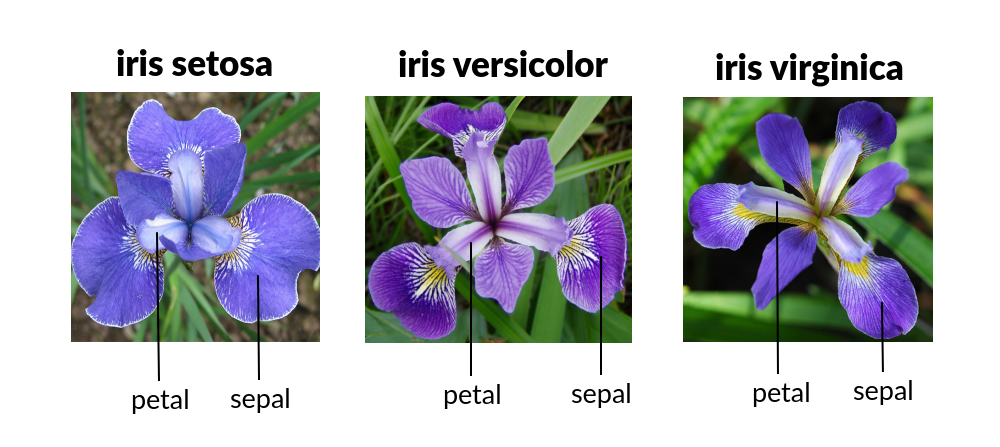

In [2]:
from IPython.display import Image
Image("iris.png")

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

In [30]:
ds = pd.read_csv(url,header=None) #chamar o header, senão ele puxa a primeira linha
ds.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [46]:
ds.shape

(150, 5)

In [38]:
col_name = ['sepal-lenght','sepal-width','petal-lenght','petal-width','class'] #dando nome às colunas

In [39]:
ds = pd.read_csv(url, names = col_name)
ds.head(10)

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [45]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-lenght  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-lenght  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
ds.describe()

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
ds['class'].value_counts() #n de linhas de cada classe

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

### Comparando a distribuição de cada variável, poderia ser violin ou boxplot:

Like box plots, violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories" (for example, temperature distribution compared between day and night, or distribution of car prices compared across different car makers).

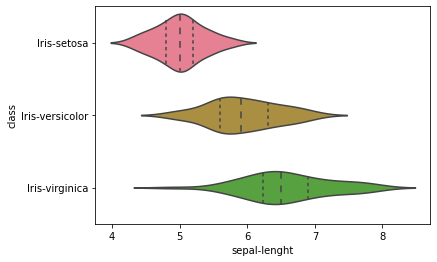

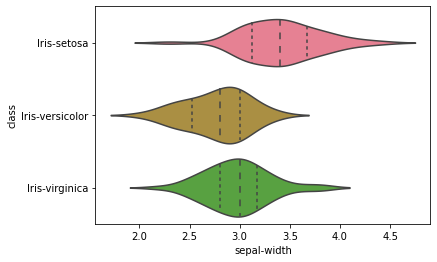

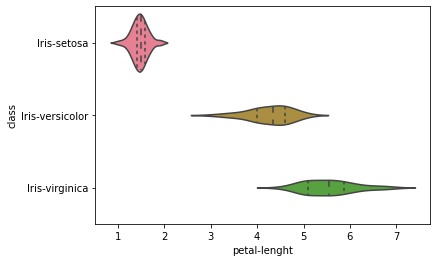

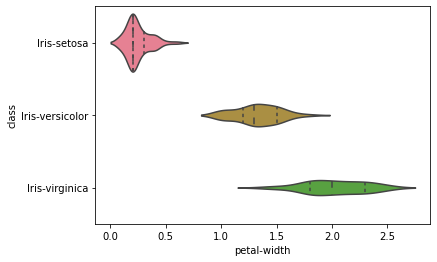

In [51]:
sns.violinplot(y='class', x='sepal-lenght', data=ds, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width', data=ds, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-lenght', data=ds, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-width', data=ds, inner='quartile')
plt.show()

## Plotagem em pares

Plotting multiple pairwise bivariate distributions in a dataset using pairplot:

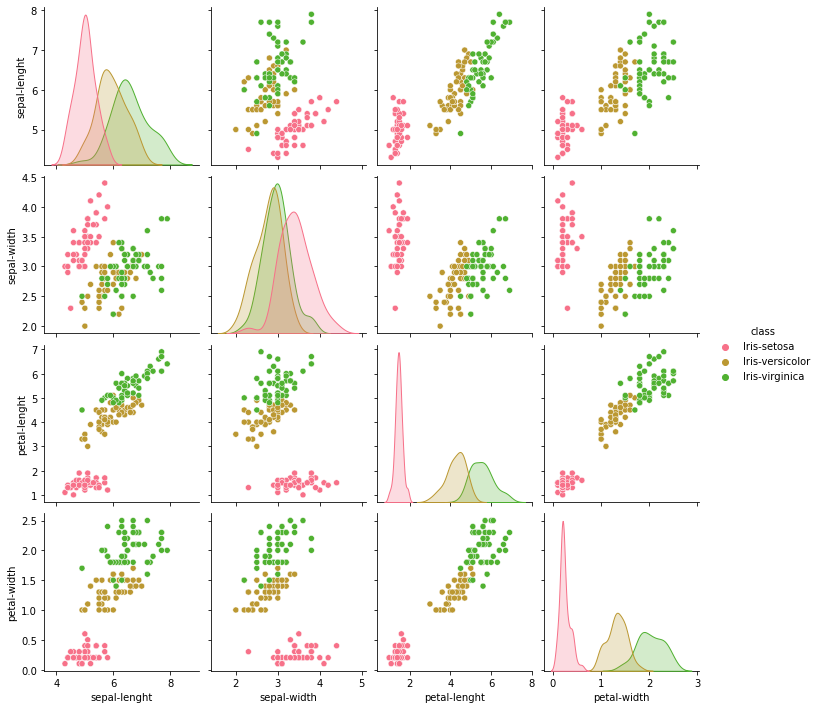

In [54]:
sns.pairplot(ds, hue='class', markers='o') # hue= separador 
plt.show()

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


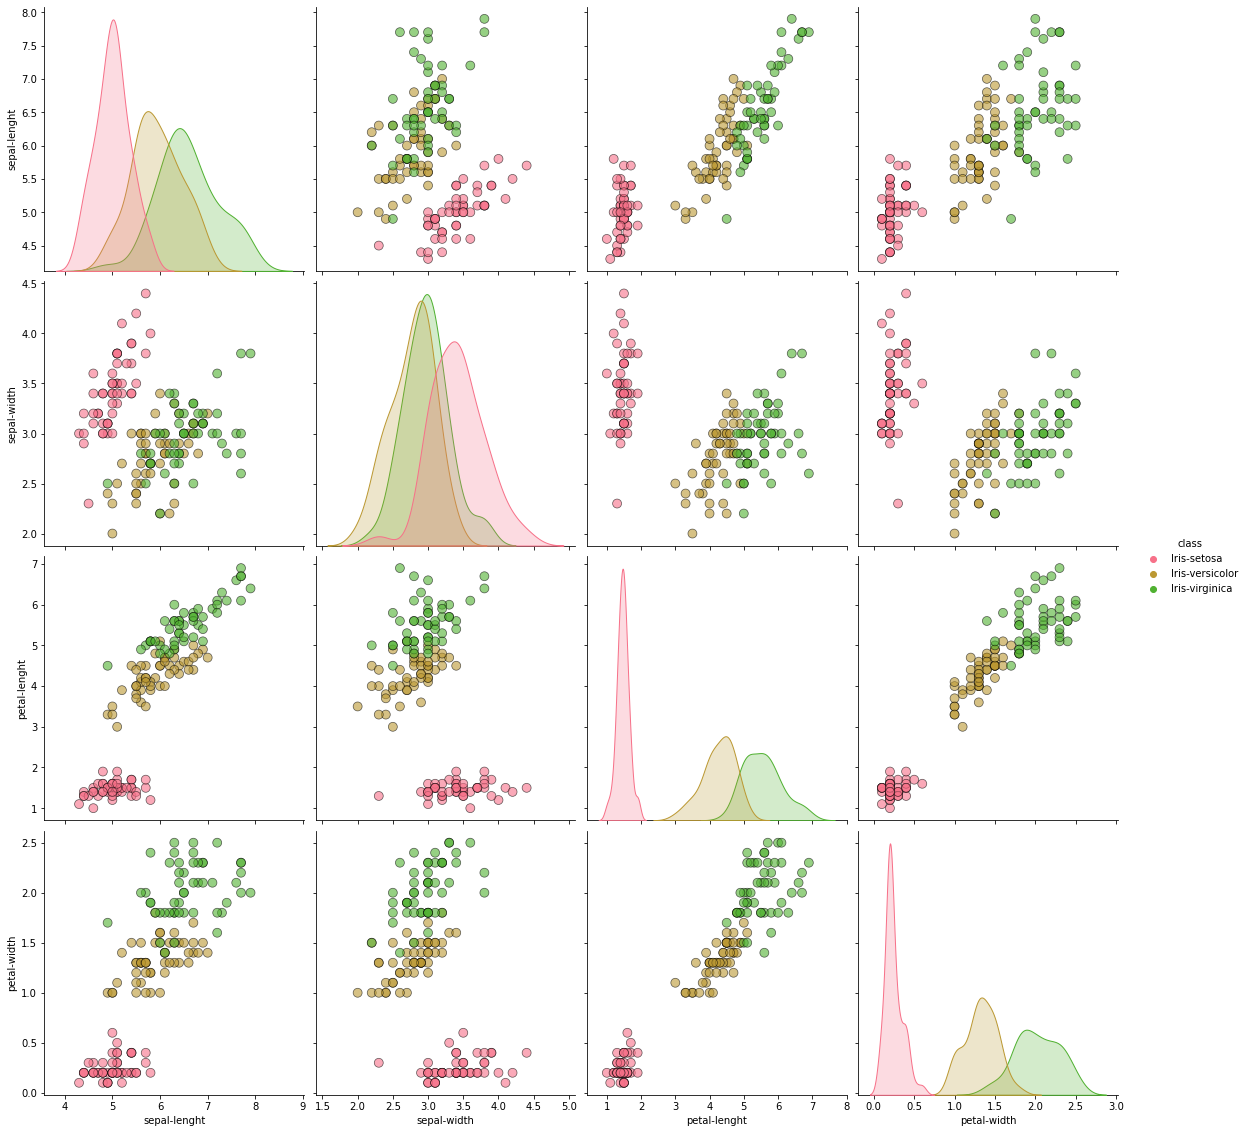

In [63]:
# Create a pair plot colored by class with a density plot of the # diagonal and format the scatter plots.
# Em dúvida sobre qual ficou mais claro

sns.pairplot(ds, hue = 'class', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

#### Iris setosa se separando das demais

## Procurar correlação

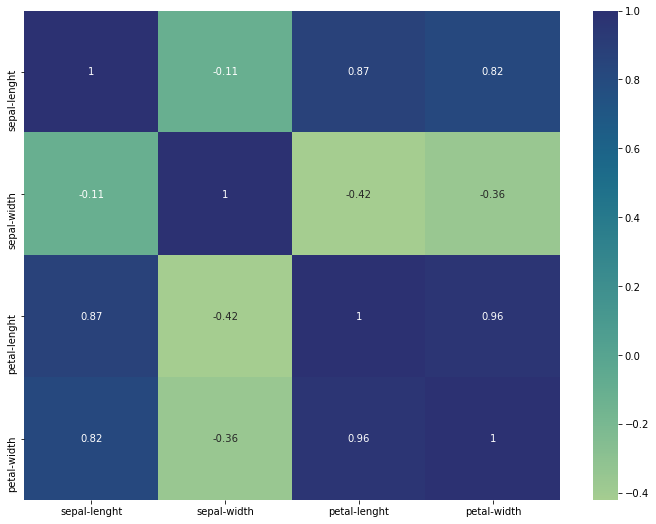

In [81]:
plt.figure(figsize=(12,9))
sns.heatmap(ds.corr(), annot=True, cmap='crest') #chamar função corr()
plt.show()

## Splitting o ds

In [82]:
X = ds.drop(['class'], axis=1)  #tiro a classe da variável X (as inputs)
y = ds['class']                 #coloco classe na y (output)
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


## Treino e Teste

Dividindo o ds em treino e teste, colocando 80% dos dados p treino do modelo e 20% para teste de validação

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)

## Criação do Modelo

In [ ]:
Testar vários algoritmos e comparar sua acurácia

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [92]:
models = [] #POO?
models.append(('LR', LogisticRegression())) #predição tomados por uma variável categórica, frequentemente binária
models.append(('LDA', LinearDiscriminantAnalysis())) #Redução de Dimensionalidade, menos info
models.append(('KNN', KNeighborsClassifier()))#Algo em Instância, constroem um bd e comparam similaridade
models.append(('CART', DecisionTreeClassifier())) #Class e Regressão
models.append(('NB', GaussianNB())) #Bayesiano, Class e Regress
models.append(('SVC', SVC(gamma='auto'))) # Class e Regress, funciona melhor p pequenos dados

# evaluate each model in turn

results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVC: 0.983333 (0.033333)


## Escolhendo o SVC, apresentou melhor accuracy

### Ajustando / treinando o modelo em X_train e Y_train usando o método .fit ().

### Prevendo no X_test usando o método .predict ().

In [93]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [94]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9666666666666667
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

